In [7]:
import numpy as np
import torch
import os
import sys
sys.path.append('../')
import utils.csv as csv
from torchmetrics.classification import MultilabelAccuracy
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
# file path
PATH='D:\\Deutschland\\FUB\\master_thesis\\data\\gee\\output'
DATA_DIR = os.path.join(PATH, 'daily_padding')
LABEL_CSV = 'label_multi.csv'

label_path = os.path.join(PATH, LABEL_CSV)

In [10]:
y_true = torch.tensor([[1,1,1], [0,0,0], [1,1,1], [1,0,1]])
y_pred = torch.tensor([[1,0,0], [1,1,1], [1,1,1], [1,0,0]])
ref = pd.read_csv('../outputs/csv/multi_label/01/lstm_7ml_ref.csv', sep=',', header=0,)
pred = pd.read_csv('../outputs/csv/multi_label/01/lstm_7ml_pred.csv', sep=',', header=0,)
ref

,Spruce,Beech,Silver fir,Pine,Douglas fir,Oak,Sycamore
0,0,1,0,1,0,1,0
1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0
3,1,0,1,0,0,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1419,0,0,0,1,0,0,0
1420,0,0,0,0,1,0,0
1421,1,1,0,0,0,0,0
1422,1,1,1,0,0,0,0


Text(0.5, 0.98, 'multi confusion matrix')

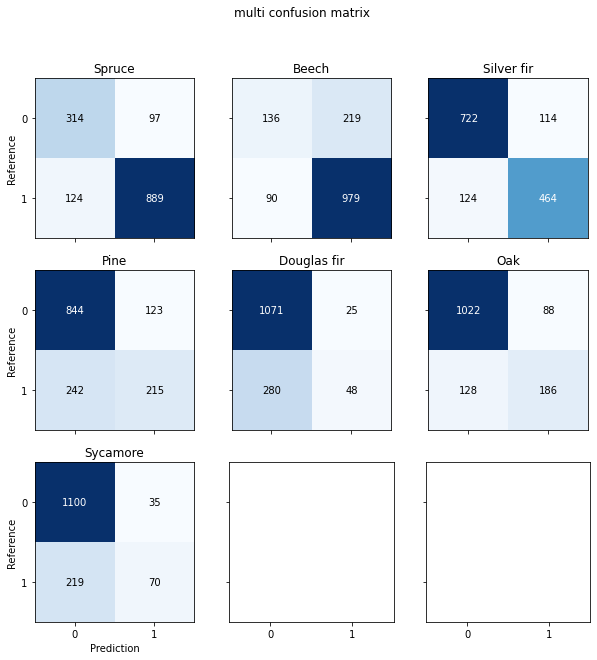

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)
for k in range(ref.shape[1]):
    header = ref.columns[k]
    y_pred = pred.iloc[:, k]
    y_true = ref.iloc[:, k]
    # confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    # draw figure
    plt.subplot(3, 3, k + 1)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    thresh = matrix.max() / 2.
    for i in range(len(matrix)):    
        for j in range(len(matrix[i])):    
            plt.text(j, i, format(matrix[i][j]), 
                    ha="center", va="center", 
                    color="white" if matrix[i, j] >= thresh else "black")
    #set title and label
    indices = range(len(matrix))
    plt.xticks(indices)
    plt.yticks(indices)
    if k % 3 == 0:
        plt.ylabel('Reference')
    if k // 3 == 2:
        plt.xlabel('Prediction')
    plt.title(header)
plt.suptitle('multi confusion matrix')